In [1]:
# Data management
import pandas as pd

# Math and Stat modules
import numpy as np

# Data preprocessing and trasformation (ETL)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

#Imputer
from sklearn.impute import SimpleImputer

#Supervised Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, learning_curve, validation_curve, cross_validate
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

# Presentazione problema

# ETL Processing

In [2]:
dataset = pd.read_csv("data/marketing_campaign.csv", sep=";")
pd.set_option("max_colwidth", 200)
pd.read_csv("data/columnsInfo.csv", sep=";")

,Column's name,Description
0,ID,Customer's id
1,Year_Birth,Customer's year of birth
2,Education,Customer’s level of education
3,Marital_Status,Customer’s marital status
4,Income,Customer’s yearly household income
5,Kidhome,Number of small children in customer’s household
6,Teenhome,Number of teenagers in customer’s household
7,Dt_Customer,Date of customer’s enrolment with the company
8,Recency,Number of days since the last purchase
9,MntWines,Amount spent on wine products in the last 2 years


In [3]:
dataset.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

Prendo le Label

In [4]:
dataset_label = dataset['Response'].values
dataset.drop(columns=['Response'], inplace=True)

Guardo come sono distribuiti i dati per preprocessarli

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>],
       [<AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>,
 

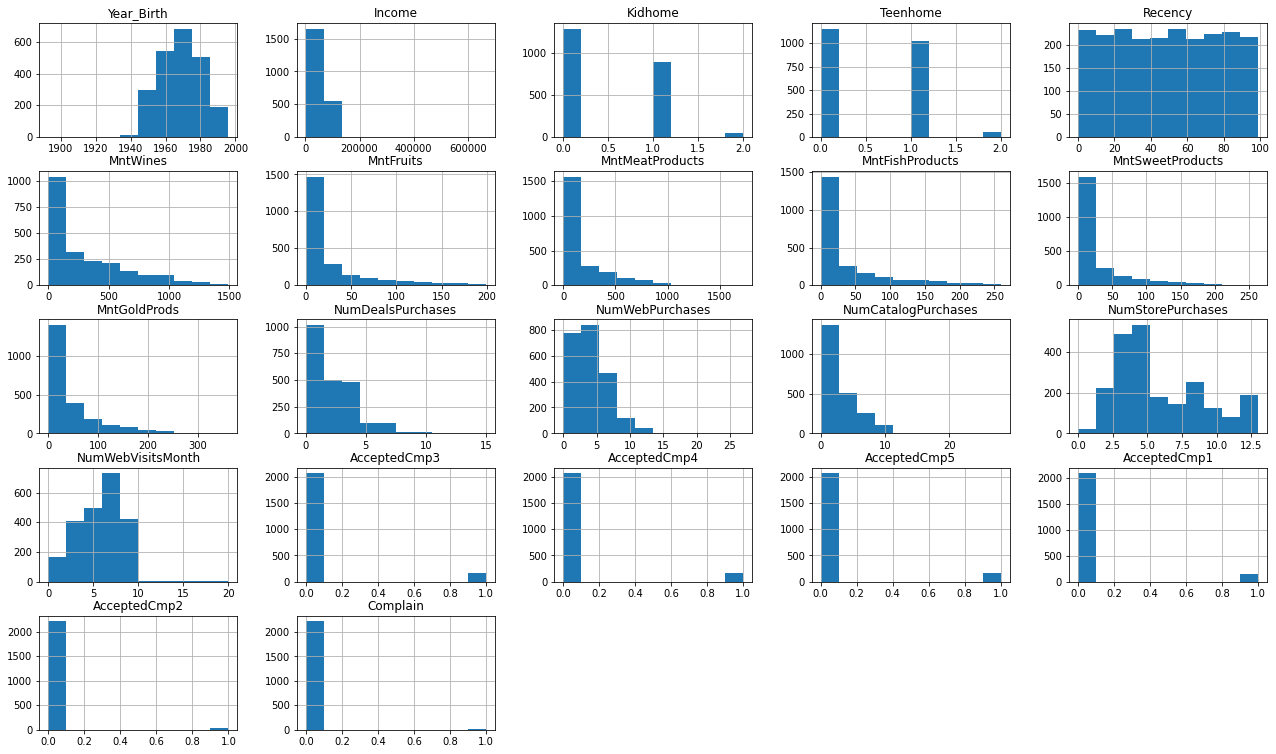

In [5]:
dataset.hist(figsize=(22,13))

In [6]:
class DateTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, startDate = pd.to_datetime("2015-01-01")):
        self.startDate = startDate
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_new = pd.to_datetime(X.iloc[:,0])
        X_new = pd.DataFrame((self.startDate - X_new).transform(lambda days: days.total_seconds()/(60*60*24*30)))
        return X_new

In [7]:
income_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

date_pipeline = Pipeline([
    ('transformer', DateTransformer()),
    ('scaler', StandardScaler())
])

normal_features = ['Year_Birth', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumCatalogPurchases', 'NumDealsPurchases', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumStorePurchases']

In [8]:
data_preprocessing = ColumnTransformer([
    ('normal', MinMaxScaler(), normal_features),
    ('cat', OneHotEncoder(), ['Education', 'Marital_Status']),
    ('income', income_pipeline, ['Income']),
    ('dateSubscription', date_pipeline, ["Dt_Customer"])
],
    remainder = 'passthrough'
)

feature_matrix = data_preprocessing.fit_transform(dataset)

# Training e Test Sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, dataset_label, test_size = 0.25, random_state = 42)

# Algoritmi/modelli da utilizzare

Si utilizzeranno i seguenti modelli di ML:
- Perceptron
- LogisticRegression 
- Support Vector Machine
- Decision Tree
- Bagging
- Ada Boost
- Gradient Boosting
- Random Forest
- Extra Tree

In [10]:
final_scores = [] #Name, predictions, train_size, train_scores, test_scores

skf = StratifiedKFold(n_splits=5)

def drawAccuracy(train_size, train_scores, test_scores):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    fig=plt.figure(figsize=(12,7))
    ax = fig.add_subplot()

    ax.plot(train_size, train_mean,
             color='blue', marker='+',
             markersize=5, label='Training accuracy')

    ax.fill_between(train_size,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    ax.plot(train_size, test_mean,
             color='green', linestyle='--',
             marker='d', markersize=5,
             label='Validation accuracy')

    ax.fill_between(train_size,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    ax.grid()
    ax.set_xlabel('Dimensione del training set')
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_ylim([0.6, 1.03])

## Perceptron

In [11]:
perceptron_cls = Perceptron()

perceptron_prediction = cross_val_predict(perceptron_cls, X_train, y_train, cv = skf)
train_size, train_scores, test_scores = learning_curve(perceptron_cls, X=feature_matrix, y=dataset_label, train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], cv = skf, n_jobs = -1)

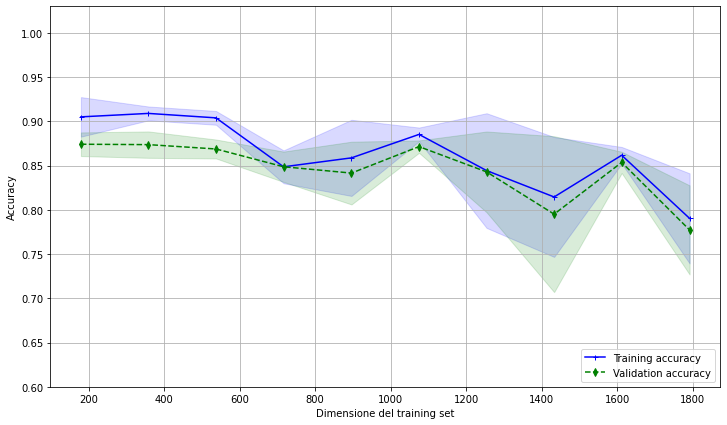

In [12]:
drawAccuracy(train_size, train_scores, test_scores)

In [13]:
final_scores.append(("Perceptron", perceptron_prediction, train_size, train_scores, test_scores))

## Logistic Regression

In [14]:
logit_cls = LogisticRegression(max_iter=1000)

logit_prediction = cross_val_predict(logit_cls, X_train, y_train, cv = skf)
train_size, train_scores, test_scores = learning_curve(logit_cls, X=feature_matrix, y=dataset_label, train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], cv = skf, n_jobs = -1)

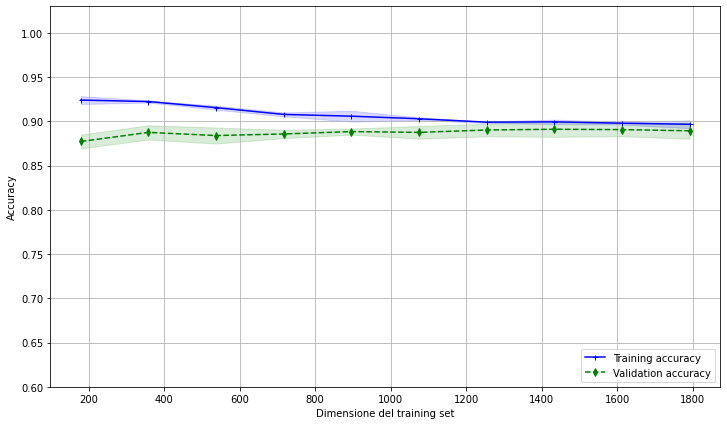

In [15]:
drawAccuracy(train_size, train_scores, test_scores)

In [16]:
final_scores.append(("Logistic Regression", logit_prediction, train_size, train_scores, test_scores))

## SVC

In [17]:
gamma1, gamma2 = 0.1, 2
C1, C2 = 0.01, 5
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

train_sizes, train_means, test_means, test_stds, train_stds, SVC_predictions = [],[],[],[],[],[]
for gamma, C in hyperparams:
    svc_cls = SVC(kernel="rbf", gamma = gamma, C = C)
    svc_prediction = cross_val_predict(svc_cls, X_train, y_train, cv = skf)
    train_size, train_scores, test_scores = learning_curve(svc_cls, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv=skf, n_jobs=-1)
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

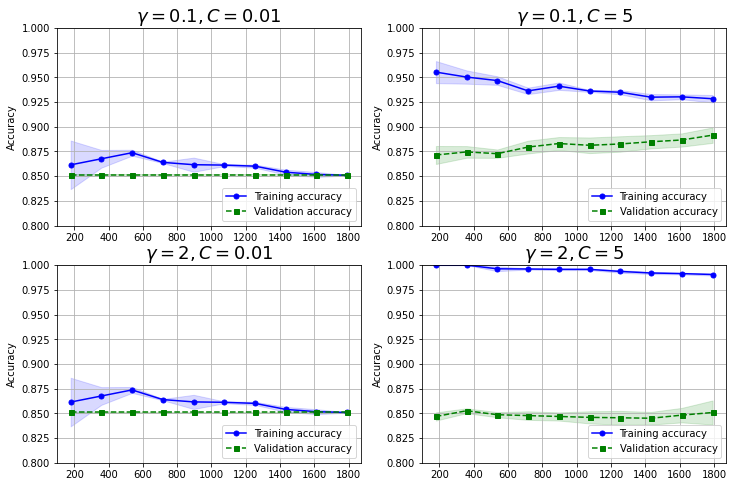

In [18]:
fig= plt.figure(figsize=(12, 8))
for i in range(4):
    ax = fig.add_subplot(221+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"$\gamma={}, C={}$".format(*hyperparams[i]), fontsize=18)

In [19]:
svc_cls = SVC(kernel="rbf", gamma = 0.1, C = 2)
svc_prediction = cross_val_predict(svc_cls, X_train, y_train, cv = skf)
train_size, train_scores, test_scores = learning_curve(svc_cls, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv=skf, n_jobs=-1)

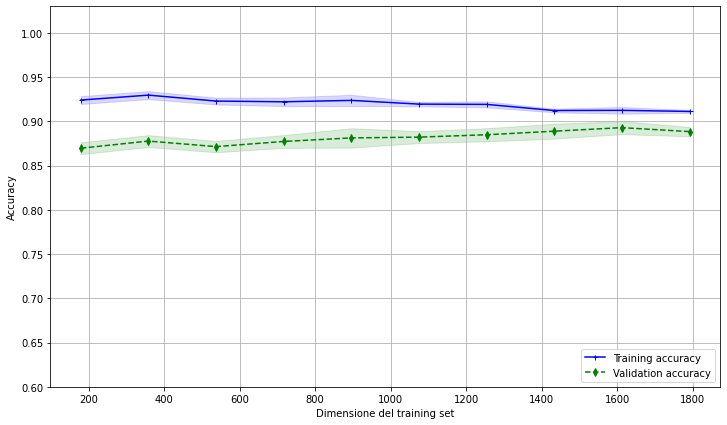

In [20]:
drawAccuracy(train_size, train_scores, test_scores)

In [21]:
final_scores.append(("SVC", svc_prediction, train_size, train_scores, test_scores))

## Decision Tree

In [22]:
min_leaf = [20, 30, 40, 50, 100]

train_sizes, train_means, test_means, test_stds, train_stds = [],[],[],[],[]
for mlf in min_leaf:
    dt_clf = DecisionTreeClassifier(min_samples_leaf=mlf, random_state=42, max_depth=15)
    dt_prediction = cross_val_predict(dt_clf, X_train, y_train, cv = skf)
    train_size, train_scores, test_scores = learning_curve(dt_clf, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv=skf, n_jobs=-1)
    train_means.append(np.mean(train_scores, axis=1))
    train_stds.append(np.std(train_scores, axis=1))
    test_means.append(np.mean(test_scores, axis=1))
    test_stds.append(np.std(test_scores, axis=1))
    train_sizes.append(train_size)

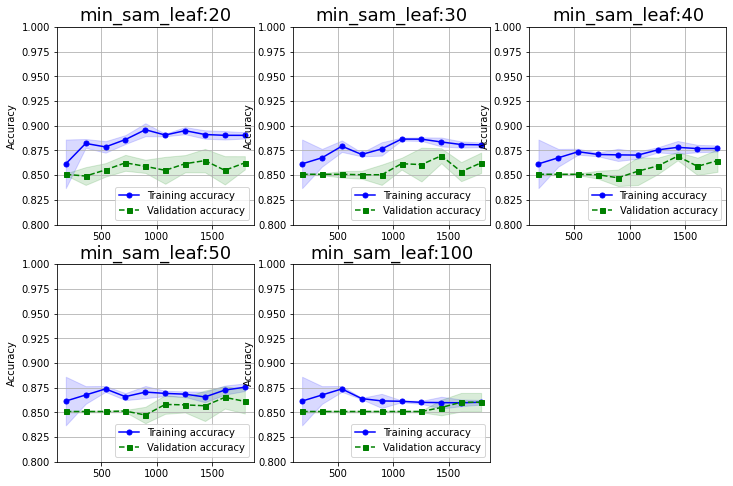

In [23]:
fig= plt.figure(figsize=(12, 8))
for i in range(5):
    ax = fig.add_subplot(231+i)
    ax.plot(train_sizes[i], train_means[i],
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_sizes[i],
                 train_means[i] + train_stds[i],
                 train_means[i] - train_stds[i],
                 alpha=0.15, color='blue')
    ax.plot(train_sizes[i], test_means[i],
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_sizes[i],
                 test_means[i] + test_stds[i],
                 test_means[i] - test_stds[i],
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.8,1))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(r"min_sam_leaf:{}".format(min_leaf[i]), fontsize=18)

In [24]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=40, random_state=42, max_depth=15)
dt_prediction = cross_val_predict(dt_clf, X_train, y_train, cv = skf)
train_size, train_scores, test_scores = learning_curve(dt_clf, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv=skf, n_jobs=-1)

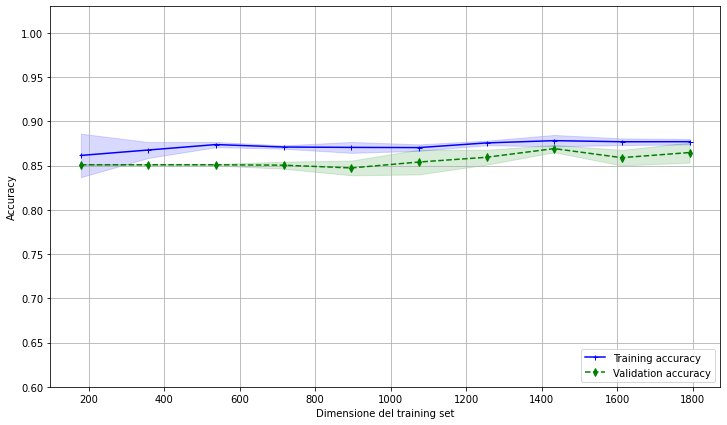

In [25]:
drawAccuracy(train_size, train_scores, test_scores)

In [26]:
final_scores.append(("Decision Tree", dt_prediction, train_size, train_scores, test_scores))

## Bagging

In [27]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=250, max_samples=100, bootstrap=True, n_jobs=-1)

bagging_prediction = cross_val_predict(bag_clf, X_train, y_train, cv = skf)
train_size, train_scores, test_scores = learning_curve(bag_clf, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = skf, n_jobs = -1)

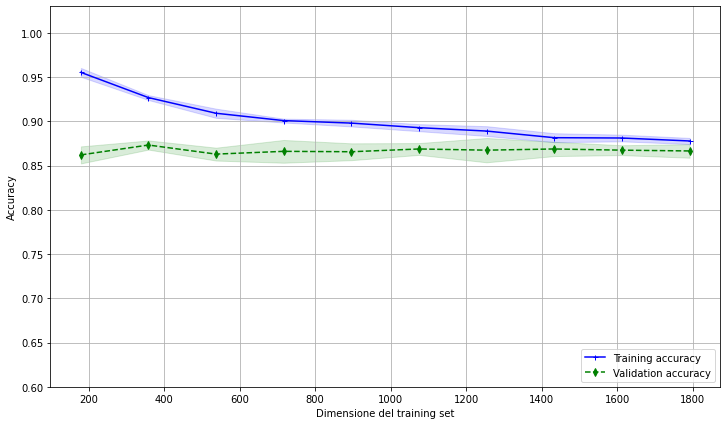

In [28]:
drawAccuracy(train_size, train_scores, test_scores)

In [29]:
final_scores.append(("Bagging", bagging_prediction, train_size, train_scores, test_scores))

## Ada Boost

In [30]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=60), n_estimators=250, algorithm='SAMME.R', learning_rate=1)

ada_prediction = cross_val_predict(ada_clf, X_train, y_train, cv = skf)
train_size, train_scores, test_scores = learning_curve(ada_clf, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = skf, n_jobs = -1)

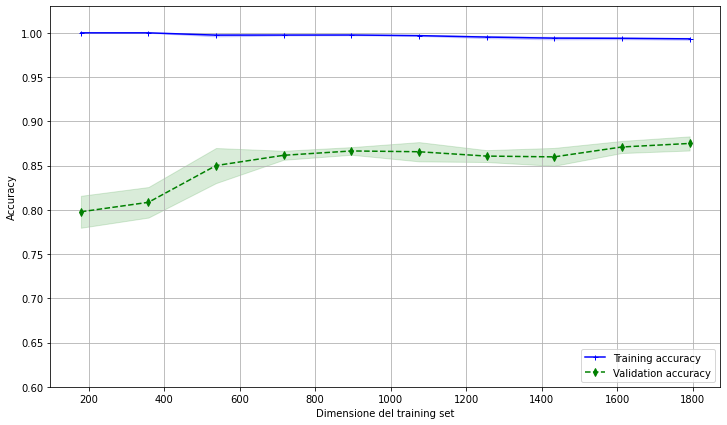

In [31]:
drawAccuracy(train_size, train_scores, test_scores)

In [32]:
accuracy_score(y_train, ada_prediction), precision_score(y_train, ada_prediction), recall_score(y_train, ada_prediction), f1_score(y_train, ada_prediction), 

(0.8767857142857143,
 0.6990291262135923,
 0.2903225806451613,
 0.4102564102564103)

In [33]:
final_scores.append(("Ada Boost", ada_prediction, train_size, train_scores, test_scores))

## Gradient Boosting

In [34]:
gb_clf = GradientBoostingClassifier(n_estimators=350, max_leaf_nodes=2, max_features=10)

gb_prediction = cross_val_predict(gb_clf, X_train, y_train, cv = skf)
train_size, train_scores, test_scores = learning_curve(gb_clf, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = skf, n_jobs = -1)

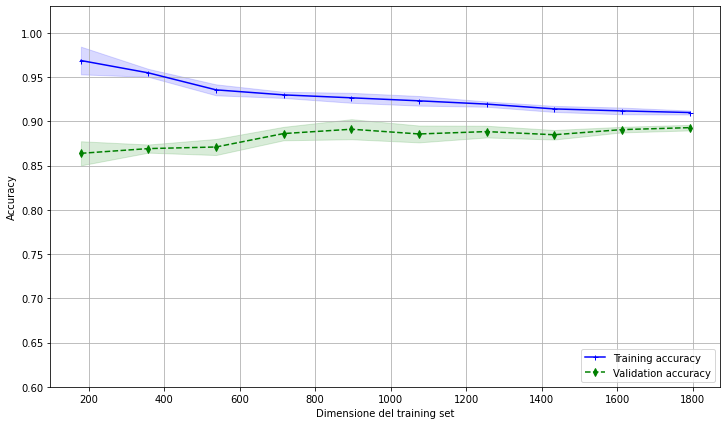

In [35]:
drawAccuracy(train_size, train_scores, test_scores)

In [36]:
final_scores.append(("Gradient Boosting", gb_prediction, train_size, train_scores, test_scores))

## Random Forest

In [37]:
rnf_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=20, n_jobs=-1, max_features=10)

rand_forest_prediction = cross_val_predict(rnf_clf, X_train, y_train, cv = skf)
train_size, train_scores, test_scores = learning_curve(rnf_clf, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = skf, n_jobs = -1)

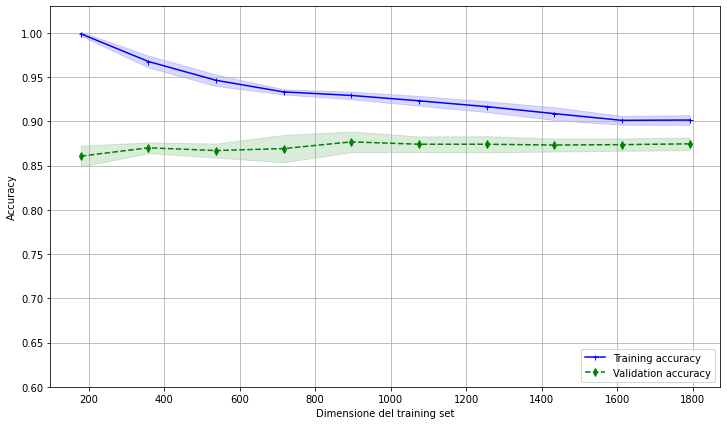

In [38]:
drawAccuracy(train_size, train_scores, test_scores)

In [39]:
final_scores.append(("Random Forest", rand_forest_prediction, train_size, train_scores, test_scores))

## Extra Trees

In [40]:
et_clf = ExtraTreesClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1, max_features=10)

extra_trees_prediction = cross_val_predict(et_clf, X_train, y_train, cv = skf)
train_sizes, train_scores, test_scores = learning_curve(et_clf, X=feature_matrix, y=dataset_label, train_sizes=np.linspace(0.1,1.0,10), cv = skf, n_jobs = -1)

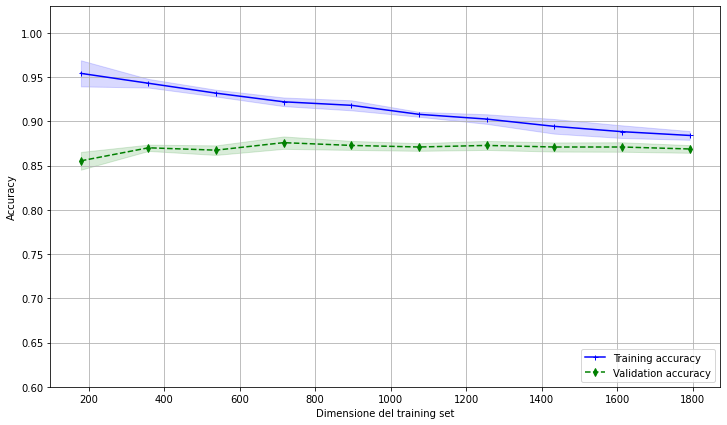

In [41]:
drawAccuracy(train_size, train_scores, test_scores)

In [42]:
final_scores.append(("Extra Trees", extra_trees_prediction, train_size, train_scores, test_scores))

# Cross-validation

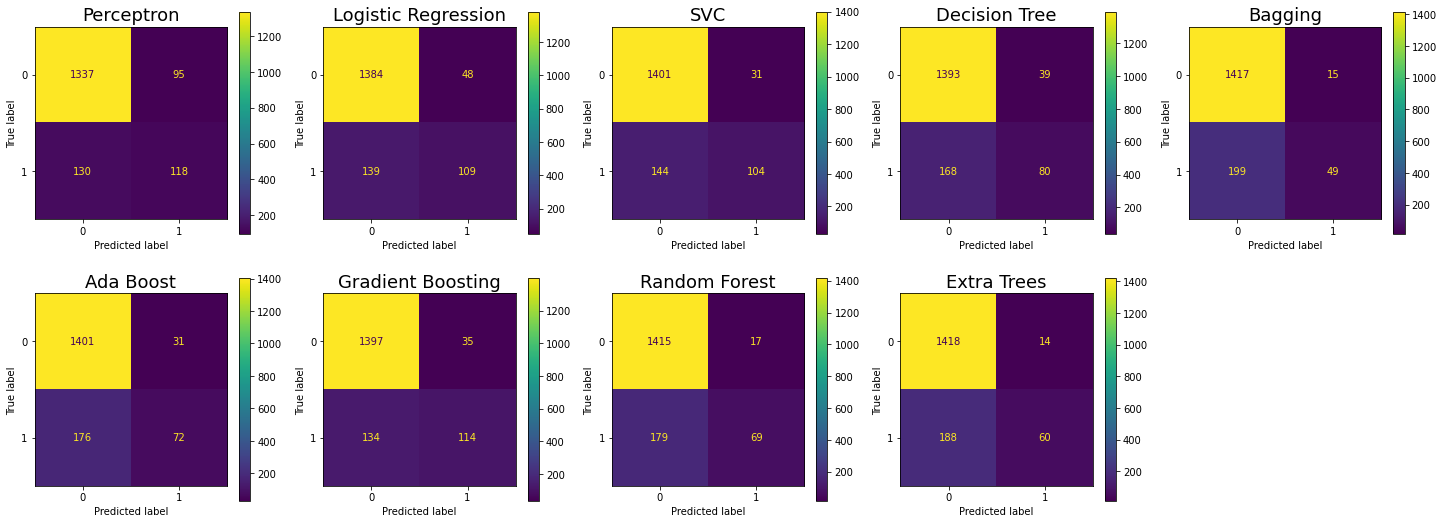

In [43]:
fig= plt.figure(figsize=(25, 9))
for i, (name, prediction, train_size, train_scores, test_scores) in enumerate(final_scores):
    ax = fig.add_subplot(251+i)
    cm = confusion_matrix(y_train, prediction)
    ConfusionMatrixDisplay(cm).plot(ax=ax)
    ax.set_title(name, fontsize=18)

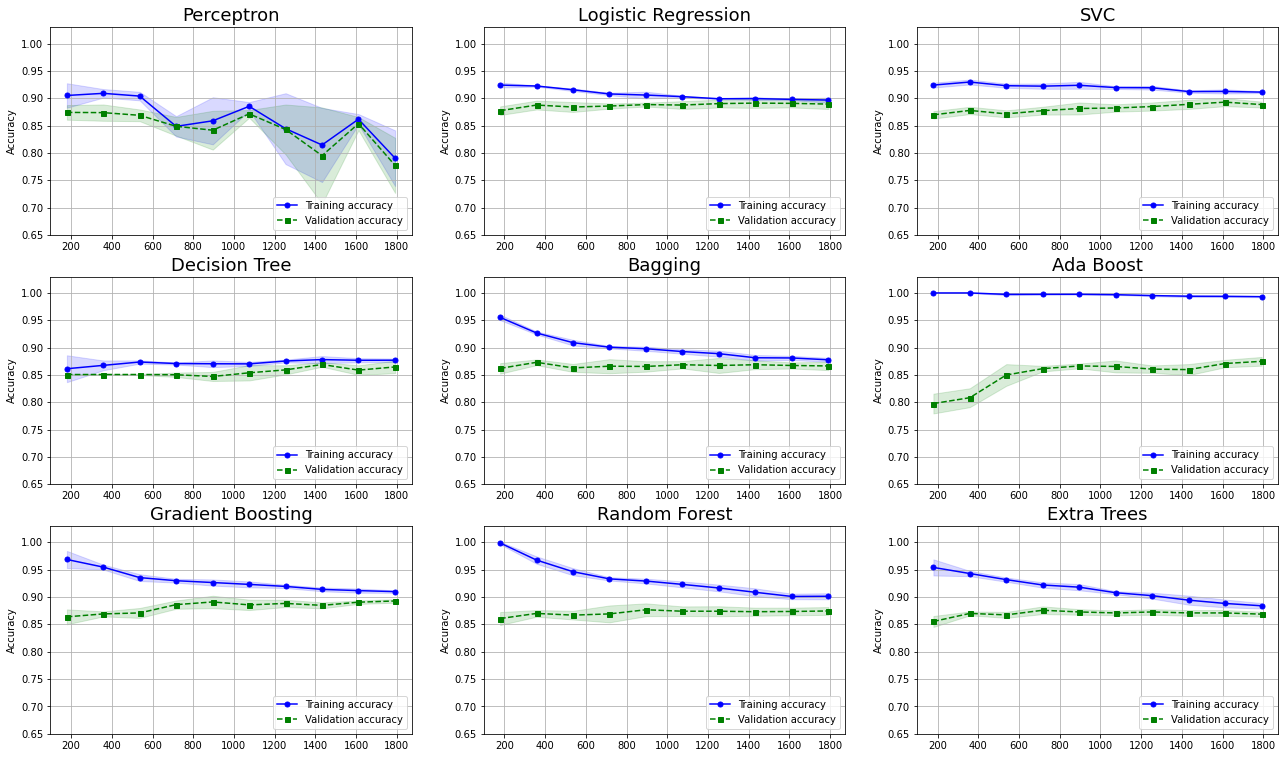

In [44]:
fig= plt.figure(figsize=(22, 13))
for i, (name, prediction, train_size, train_scores, test_scores) in enumerate(final_scores):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    ax = fig.add_subplot(331+i)
    ax.plot(train_size, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
    ax.fill_between(train_size,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
    ax.plot(train_size, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
    ax.fill_between(train_size,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
    ax.grid()
    ax.set_ylim((0.65,1.03))
    ax.set_ylabel('Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(name, fontsize=18)

In [53]:
columns = ["Accuracy", "Precision", "Recall", "F1"]
final_table = pd.DataFrame(columns=columns)
for (name, prediction, train_size, train_scores, test_scores) in final_scores:
    accuracy = accuracy_score(y_train, prediction)
    precision = precision_score(y_train, prediction)
    recall = recall_score(y_train, prediction)
    f1 = f1_score(y_train, prediction)
    data = [accuracy, precision, recall, f1]
    final_table = pd.concat([final_table, pd.DataFrame([data], columns=columns, index=[name])])

In [70]:
dfstyle = [dict(selector="th", props=[('font-size', '20pt')]),dict(selector="td", props=[('font-size', '20pt')])]
final_table.style.set_table_styles(dfstyle).background_gradient(axis=0, cmap=sns.light_palette("green", as_cmap=True))

,Accuracy,Precision,Recall,F1
Perceptron,0.866071,0.553991,0.475806,0.511931
Logistic Regression,0.888690,0.694268,0.439516,0.538272
SVC,0.895833,0.770370,0.419355,0.543081
Decision Tree,0.876786,0.672269,0.322581,0.435967
Bagging,0.872619,0.765625,0.197581,0.314103
Ada Boost,0.876786,0.699029,0.290323,0.410256
Gradient Boosting,0.899405,0.765101,0.459677,0.574307
Random Forest,0.883333,0.802326,0.278226,0.413174
Extra Trees,0.879762,0.810811,0.241935,0.372671


<AxesSubplot:>

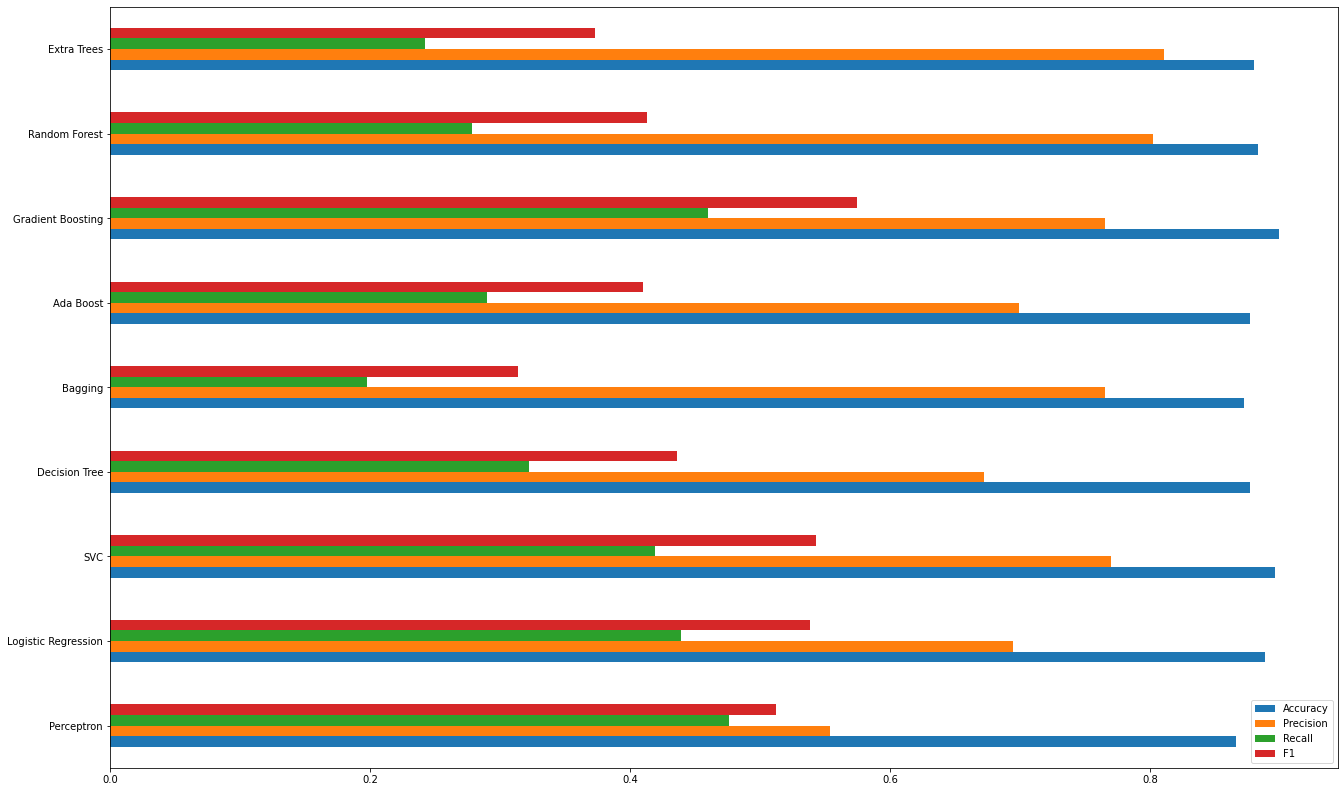

In [46]:
final_table.plot(kind="barh", figsize=(22,14))

# Conclusioni